# CS5002: Programming Principles and Practice

## Practical P3: Data analysis and visualisation Python
### 210007559

The primary objective of this practical is to apply programming principles to a real-world dataset, demonstrating data loading, validation, refinement, and exploratory analysis. Specifically, this report utilises pandas for data manipulation and cleaning, and Matplotlib for generating visualisations. All basic requirements were completed. All of the easy and medium additional requirements were completed, along with the first hard requirement.

To start, the `refine_data.py` script needed to be produced. The script is broken into specialised functions:
-  `load_data` : Loads the CSV data into a pandas DataFrame, also prints the total number of records and the type of each variable in the dataset.
-  `load_dictionary` : Loads the data dictionary containing the expected variable types and allowed values.
-  `refine` : Performs consistency checks and refines the raw census data by validate types and admissible values using the data dictionary and removing duplicates. Uses df = df_raw.copy() so that the original raw data is unmodified, ensuring that if the refine function is run multiple times, it always starts from the same source. Pandas documentation used for help with creating the refine function.
-  `save_refined_data` : Saves the refined DataFrame to a new CSV file.
-  `save_removed_records`: Saves the removed/broken records (if any) to a CSV for inspection. 
-  `main` : Makes the entire data refinement process executable from a single terminal command. This ensures the cleaning process is identical every time and is independent of the Jupyter Notebook environment. Python documentation used for help with argparse.

This makes each part independently testable and reusable for different datasets. This script redirects all output to log files, using the logging library. This provides a full history of what the script did that is still accessible even once closing the terminal.

The issue that arose when trying to import and use this script was that it could not be found since it was located in a different folder to this notebook, so to fix this the code directory needs to be manually added to the system path. Its also shown below how to run the refinement process in the notebook.

In [1]:
from pathlib import Path
import sys

# Since the code is in a different folder to the notebooks, 
# first need to ensure the code directory is on the system path 
# otherwise cannot find the refine_data script for importing functions
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
code_dir = project_root / "code"

# Add the specific 'code' directory to the system path
sys.path.append(str(code_dir))

# Ensure the project root is on the path
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import the script
import refine_data as rd

raw_csv = Path("../data/census-2021-public-microdata-teaching-sample.csv")
df_raw = rd.load_data(raw_csv)

dict_json = Path("../data/data_dictionary.json")
data_dict = rd.load_dictionary(dict_json)

INFO:Successfully loaded 16894 records.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SerialNum                    16894 non-null  int64
 1   AGE_BAND_AGG8                16894 non-null  int64
 2   COB_AGG3                     16894 non-null  int64
 3   ECONOMIC_ACTIVITY_10M        16894 non-null  int64
 4   ETHNIC_GROUP_AGG2            16894 non-null  int64
 5   HEALTH_IN_GENERAL            16894 non-null  int64
 6   FAMILY_TYPE                  16894 non-null  int64
 7   HH_SOCGRADE4                 16894 non-null  int64
 8   HOURS_PER_WEEK_WORKED        16894 non-null  int64
 9   IN_FULL_TIME_EDUCATION       16894 non-null  int64
 10  INDUSTRY_CURRENT_10A         16894 non-null  int64
 11  LEGAL_PARTNERSHIP_STATUS_6A  16894 non-null  int64
 12  OCCUPATION_CURRENT_1DIGIT    16894 non-null  int64
 13  RELIGI

Can see that the dataframe contains 16894 records, as expected, and there is no missing data values or any types other than integers, so we can expect not much refinement to occur.

In [2]:
df_refined = rd.refine(df_raw, data_dict)
# can then save the refined data to a new csv file, 
# however since this file has already been created from the terminal I wont proceed with this step
#output_csv = Path("../data/refined_data.csv")
#refine_data.save_refined_data(df_refined, output_csv)

INFO:No duplicate records found.
INFO:No further inconsistencies found.
INFO:Refinement complete. Final record count: 16894


### Data analysis and visualisation
Once the data has been refined, it can be analysed. 
A seperate `data_analysis` script was created to hold the functions needed for this process:
-  `mapping_from_dict`: Retrieves the code to textual label mapping for a given column from the data dictionary. This is required to ensure textual interpretations for values of the variables from the data dictionary are displayed instead of their alphanumeric codes.
-  `get_labels_and_counts`: Calculates value counts and prepares descriptive labels.
-  `bar_chart`: Generates a bar chart for a categorical variable, handling data retrieval and labelling.
-  `pie_chart`: Generates a pie chart for a categorical variable, again handling data retrieval and labelling. Matplotlib documentation was used for help with creating the plotting functions.
-  `crosstab_groupby`: Creates a cross-tabulation table between two variables with descriptive labels using pandas groupby().
-  `pandas_filtering`: Filters the DataFrame based on specific codes in one column and plots the distribution of a second column for the filtered subset. Pandas documentation used for help with this function and for using groupby.
-  `interactive_plot`: Creates an interactive widget to be able to control plot properties i.e choosing a different property without having to rerun the notebook. The Widget documentation was used to help with this function.

These functions make it so that generating a new chart, just requires changing the column name, making the code highly reusable.
The `data_analysis` script needs to be imported in before accessing these functions.

We start by loading in the refined dataset using the `load_data` function, as above since no records were removed it contains 16894 entries, with all data types being integers as needed. 

In [3]:
# Import the scripts
import refine_data as rd
import data_analysis as da

# load in the refined data frame
refined_csv = Path("../data/refined_data.csv")
df_refined = rd.load_data(refined_csv)

INFO:Successfully loaded 16894 records.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   SerialNum                    16894 non-null  int64
 1   AGE_BAND_AGG8                16894 non-null  int64
 2   COB_AGG3                     16894 non-null  int64
 3   ECONOMIC_ACTIVITY_10M        16894 non-null  int64
 4   ETHNIC_GROUP_AGG2            16894 non-null  int64
 5   HEALTH_IN_GENERAL            16894 non-null  int64
 6   FAMILY_TYPE                  16894 non-null  int64
 7   HH_SOCGRADE4                 16894 non-null  int64
 8   HOURS_PER_WEEK_WORKED        16894 non-null  int64
 9   IN_FULL_TIME_EDUCATION       16894 non-null  int64
 10  INDUSTRY_CURRENT_10A         16894 non-null  int64
 11  LEGAL_PARTNERSHIP_STATUS_6A  16894 non-null  int64
 12  OCCUPATION_CURRENT_1DIGIT    16894 non-null  int64
 13  RELIGI

### Basic requirements
Descriptive analysis: Finding and printing all the different values that each variable takes, and the number of occurrences for each value. The results are displayed using markdown format so it is easy to read.

In [4]:
# start by importing the necessary libraries needed for the data analysis and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Iterate through every column in the refined data frame except for SerialNum
for column in df_refined.columns:
    if column == 'SerialNum':
        continue

    # use the functions to retrieve the mapping and get the labelled data
    code_mapping = da.mapping_from_dict(column, data_dict)
    labels, counts = da.get_labels_and_counts(df_refined, column, code_mapping)

    print(f"Variable: {column} ")

    # summary data frame for nice printing
    analysis_df = pd.DataFrame({
        'Label': labels,
        'Count': counts
    })
    
    # Display the results using the Markdown format 
    print(analysis_df.to_markdown(numalign="left", stralign="left", index=False))


Variable: AGE_BAND_AGG8 
| Label       | Count   |
|:------------|:--------|
| 0-15 years  | 3555    |
| 16-24 years | 1685    |
| 25-34 years | 2070    |
| 35-44 years | 2252    |
| 45-54 years | 2295    |
| 55-64 years | 2192    |
| 65-74 years | 1584    |
| 75+ years   | 1261    |
Variable: COB_AGG3 
| Label                                          | Count   |
|:-----------------------------------------------|:--------|
| Northern Ireland                               | 14675   |
| Rest of United Kingdom and Republic of Ireland | 1101    |
| Other                                          | 1118    |
Variable: ECONOMIC_ACTIVITY_10M 
| Label                                                             | Count   |
|:------------------------------------------------------------------|:--------|
| Does not apply                                                    | 3555    |
| Economically active (excluding full-time students): Employee      | 6181    |
| Economically active (excluding full

Visual analysis: 
Bar charts showing the number records for different categories. The `bar_chart` function just needs to be called with the variable name of choice. 
For the first plot we can see that the majority of the population are children, and the smallest proportion are people over the age of 75.
The second plot indidates that majority of the population are employees, retired or the category does not apply.

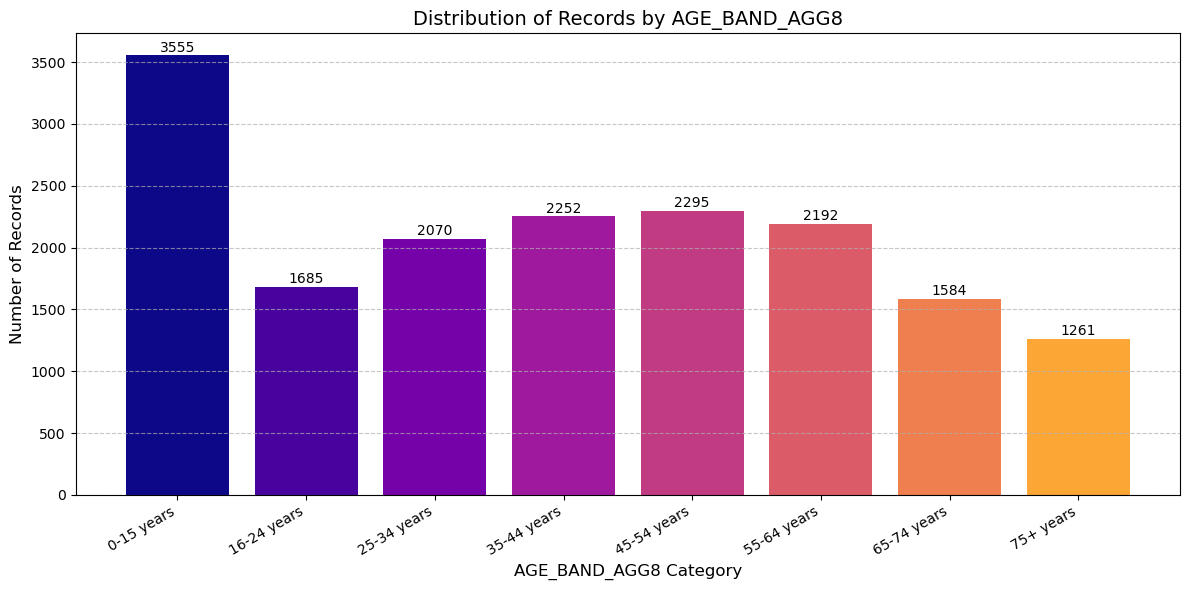

In [5]:
# age category
da.bar_chart(df_refined, 'AGE_BAND_AGG8', data_dict)

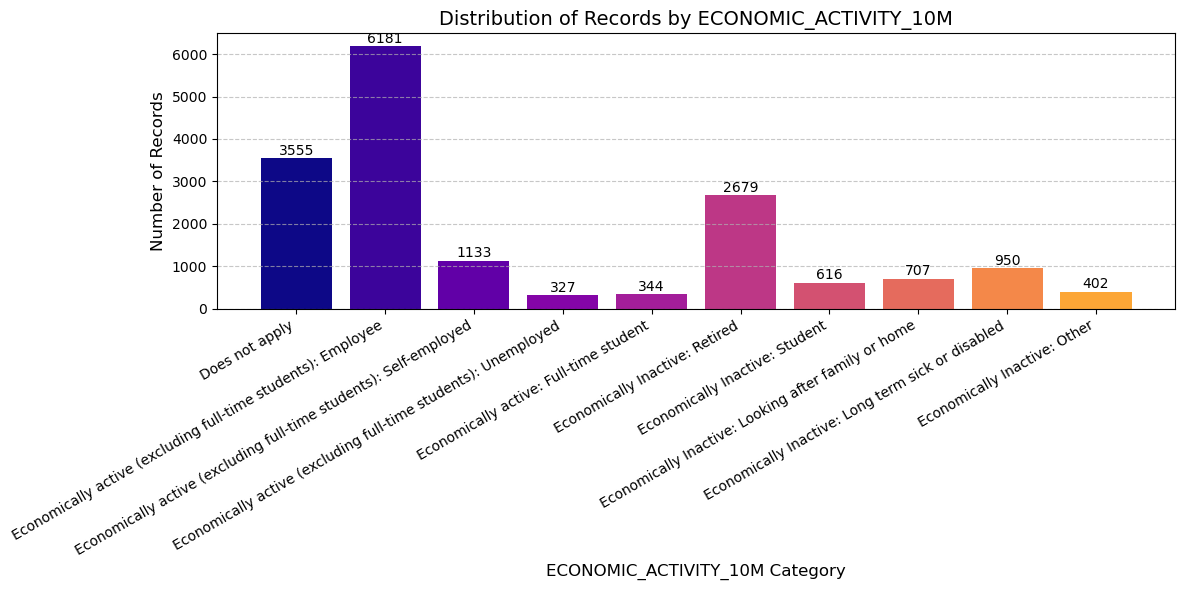

In [6]:
# Economic activity category
da.bar_chart(df_refined, 'ECONOMIC_ACTIVITY_10M', data_dict)

### Additional requirements
 Easy: pie charts for the percentage of records in different categories. Just need to call the `pie_chart` function, specifying the variable name of choice.
 The first chart illustrates the scale from very good to very bad health is most to least populated. The second chart has the highest percentage for 'does not apply' which makes sense since majoriy of the population were children, with the next highest category being full time hours (31-48). 

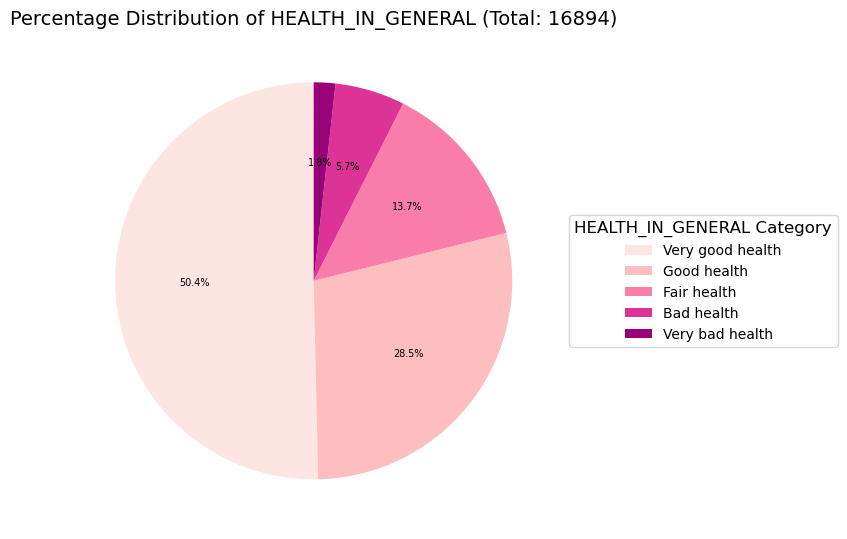

In [7]:
# health in general category
da.pie_chart(df_refined, 'HEALTH_IN_GENERAL', data_dict)

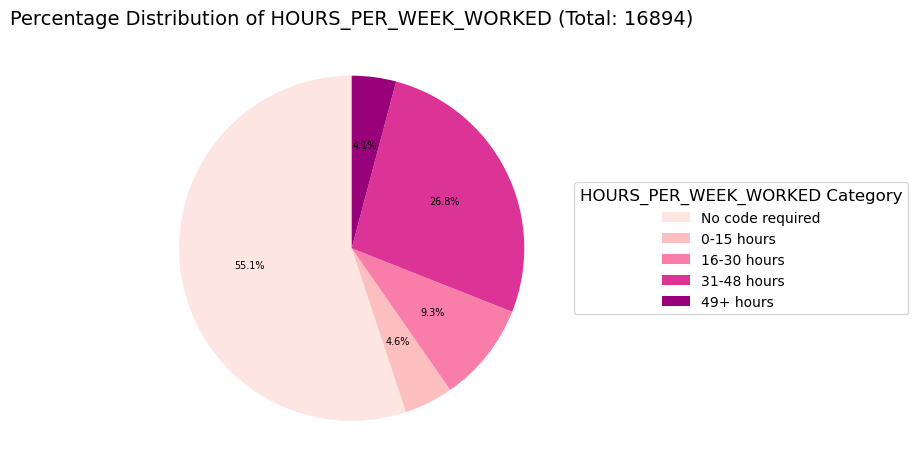

In [8]:
# Working hours per week category
da.pie_chart(df_refined, 'HOURS_PER_WEEK_WORKED', data_dict)

Medium: using groupby objects, produce two-dimensional tables for the number of records depending on hours worked per week and general health description, and the number of records depending on age and current occupation. The `crosstab_groupby` function should be called, specifying the 2 variables of choice. The tables again have been displayed using markdown to make it easy to read.

The first table illustrates that majority of the people with very bad health work fewer hours, but the majority of people with very good and good health tend to work full time hours.
The second table shows that the younger generation tends to work in customer service and trades jobs, whereas the older generation tend to have more professional occupations, as expected.

In [9]:
# Variables for the first cross-tabulation
col1 = 'HOURS_PER_WEEK_WORKED'
col2 = 'HEALTH_IN_GENERAL'

crosstab_health_hours = da.crosstab_groupby(
    df_refined, 
    col1, 
    col2, 
    data_dict)

# Display the table as a markdown table
print(crosstab_health_hours.to_markdown(stralign="left"))

| HOURS_PER_WEEK_WORKED   |   Bad health |   Fair health |   Good health |   Very bad health |   Very good health |
|:------------------------|-------------:|--------------:|--------------:|------------------:|-------------------:|
| 0-15 hours              |           20 |            79 |           238 |                 7 |                431 |
| 16-30 hours             |           26 |           169 |           607 |                 7 |                766 |
| 31-48 hours             |           58 |           375 |          1590 |                 6 |               2507 |
| 49+ hours               |            3 |            69 |           221 |                 1 |                407 |
| No code required        |          852 |          1619 |          2163 |               276 |               4397 |


In [10]:
col1 = 'AGE_BAND_AGG8'
col2 = 'OCCUPATION_CURRENT_1DIGIT'

crosstab_occupation_age = da.crosstab_groupby(
    df_refined, 
    col1, 
    col2, 
    data_dict)

# Display the table as a markdown table
print(crosstab_occupation_age.to_markdown(stralign="left"))

| AGE_BAND_AGG8   |   1. Managers, directors and senior officials |   2. Professional occupations |   3. Associate professional and technical occupations |   4. Administrative and secretarial occupations |   5. Skilled trades occupations |   6. Caring, leisure and other service occupations |   7. Sales and customer service occupations |   8. Process, plant and machine operatives |   9. Elementary occupations |   No code required |
|:----------------|----------------------------------------------:|------------------------------:|------------------------------------------------------:|------------------------------------------------:|--------------------------------:|---------------------------------------------------:|--------------------------------------------:|-------------------------------------------:|----------------------------:|-------------------:|
| 0-15 years      |                                             0 |                             0 |                               

Medium: Use pandas to find:
-  The number of economically active people depending on age: can see from the graph and table that the highest proportion are people who are aged 25-54.
-  The number of economically inactive people depending on a health descriptor: The majority comes from people with good health.
-  The number of working hours per week for students: majority of which either dont work, or work part time.
 
This can be done by stating the required codes (from variable 1) and calling the `pandas_filtering` function, specifying the 2 variables.

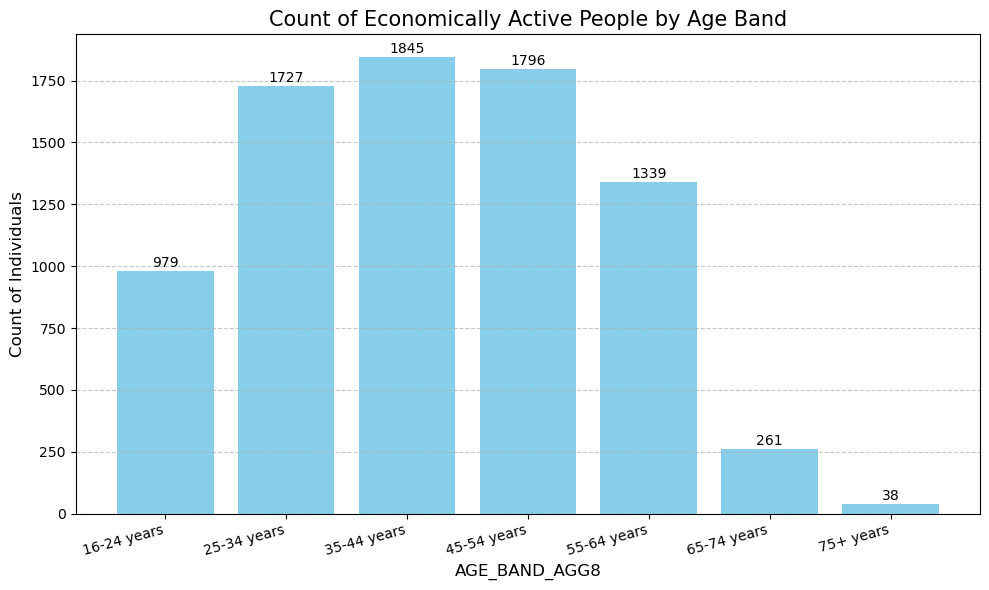

| AGE_BAND_AGG8   |   count |
|:----------------|--------:|
| 16-24 years     |     979 |
| 25-34 years     |    1727 |
| 35-44 years     |    1845 |
| 45-54 years     |    1796 |
| 55-64 years     |    1339 |
| 65-74 years     |     261 |
| 75+ years       |      38 |


In [11]:
# Codes for "Economically Active"
active_codes = ['1', '2', '3', '4']
da.pandas_filtering(
    df=df_refined,
    filter_col='ECONOMIC_ACTIVITY_10M',
    filter_codes=active_codes,
    groupby_col='AGE_BAND_AGG8',
    data_dict=data_dict,
    title='Count of Economically Active People by Age Band')

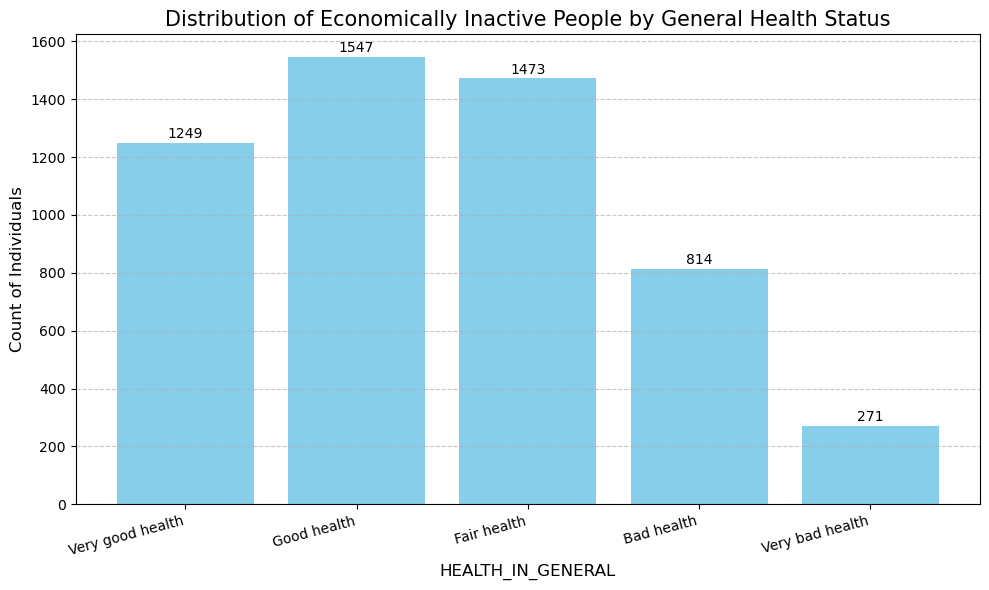

| HEALTH_IN_GENERAL   |   count |
|:--------------------|--------:|
| Very good health    |    1249 |
| Good health         |    1547 |
| Fair health         |    1473 |
| Bad health          |     814 |
| Very bad health     |     271 |


In [12]:
# Codes for "Economically inactive"
inactive_codes = ['5', '6', '7', '8', '9']

da.pandas_filtering(
    df=df_refined,
    filter_col='ECONOMIC_ACTIVITY_10M',
    filter_codes=inactive_codes,
    groupby_col='HEALTH_IN_GENERAL',
    data_dict=data_dict,
    title='Distribution of Economically Inactive People by General Health Status')

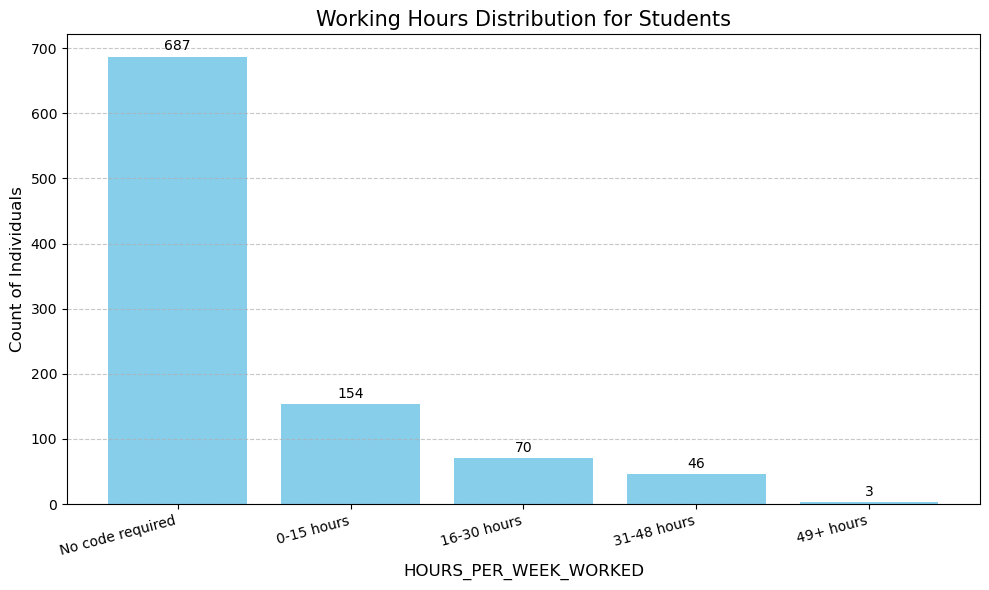

| HOURS_PER_WEEK_WORKED   |   count |
|:------------------------|--------:|
| No code required        |     687 |
| 0-15 hours              |     154 |
| 16-30 hours             |      70 |
| 31-48 hours             |      46 |
| 49+ hours               |       3 |


In [13]:
# Codes for "student"
student_codes = ['4', '6']

da.pandas_filtering(
    df=df_refined,
    filter_col='ECONOMIC_ACTIVITY_10M',
    filter_codes=student_codes,
    groupby_col='HOURS_PER_WEEK_WORKED',
    data_dict=data_dict,
    title='Working Hours Distribution for Students')

Hard: Use ipywidgets to interactively control plot properties. Call the `interactive_plot` function, specifying the 2 variables. This produces a drop down of descriptors for the first variable, and this can be changed without needing to rerun the cell. 

In [14]:
# Interactive Plot: Select a Health Category to see the Age distribution
da.interactive_plot(
    df_refined, 
    filter_col='HEALTH_IN_GENERAL', 
    target_col='AGE_BAND_AGG8', 
    data_dict=data_dict)

interactive(children=(Dropdown(description='selected_label', options=('Bad health', 'Fair health', 'Good healt…